### Importando as bibliotecas necessárias

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Gerando dados fictícios:

In [3]:

# Semente para reprodutibilidade
np.random.seed(42)

# Gerando dados fictícios para 100 casas
n_amostras = 100
# x₁: tamanho (entre 300 e 2000 m²)
x1 = np.random.uniform(300, 2000, n_amostras)
# x₂: número de quartos (entre 1 e 5)
x2 = np.random.randint(1, 6, n_amostras)
# x₃: andares (entre 1 e 3)
x3 = np.random.randint(1, 4, n_amostras)
# x₄: idade (entre 0 e 50 anos)
x4 = np.random.randint(0, 51, n_amostras)

# Criando a matriz de características (cada coluna é um recurso)
X = np.column_stack((x1, x2, x3, x4))

# Parâmetros reais para gerar o preço (com algum ruído)
# preço = b + 200*x₁ + 10000*x₂ + 15000*x₃ - 500*x₄ + ruído
b_real = 50000
w_real = np.array([200, 10000, 15000, -500])
ruido = np.random.normal(0, 20000, n_amostras)

y = b_real + X.dot(w_real) + ruido



### Escalonamento de recursos

In [4]:

# Pré-processamento: escalonamento de x₁ (exemplo com a primeira coluna)
# Divisão pelo máximo:
x1_escalado = x1 / 2000

# Normalização pela média com intervalo fixo:
# Supondo μ₁ = 600, intervalo de [300, 2000]
mu1 = 600
x1_normalizado = (x1 - mu1) / (2000 - 300)

# Padronização (Z-Score):
sigma1 = np.std(x1)
x1_zscore = (x1 - np.mean(x1)) / sigma1

# Exibindo alguns valores para comparação
print("Primeiros 5 valores de x₁ original:", x1[:5])
print("Primeiros 5 valores de x₁ escalado:", x1_escalado[:5])
print("Primeiros 5 valores de x₁ normalizado:", x1_normalizado[:5])
print("Primeiros 5 valores de x₁ (Z-Score):", x1_zscore[:5])



Primeiros 5 valores de x₁ original: [ 936.71820204 1916.2143209  1544.38970108 1317.71942313  565.23168875]
Primeiros 5 valores de x₁ escalado: [0.4683591  0.95810716 0.77219485 0.65885971 0.28261584]
Primeiros 5 valores de x₁ normalizado: [ 0.19806953  0.77424372  0.55552335  0.4221879  -0.02045195]
Primeiros 5 valores de x₁ (Z-Score): [-0.32311215  1.62343393  0.88450935  0.43404902 -1.06136481]


### Preparando os dados para a regressão linear

In [17]:

# (Aqui usaremos todas as características sem pré-processamento adicional,
#  mas você pode substituir a coluna x₁ por alguma das versões processadas)
m, n = X.shape

# Acrescenta uma coluna de 1's para o bias (intercepto)
X_bias = np.hstack((np.ones((m, 1)), X))

# Inicializando os parâmetros (w: pesos, incluindo o intercepto b na posição 0)
w = np.zeros(n + 1)

# Função para calcular o custo (Erro Quadrático Médio)
def custo(X, y, w):
    m = len(y)
    previsao = X.dot(w)
    erro = previsao - y
    return (1 / (2 * m)) * np.dot(erro, erro)

# Parâmetros do gradiente descendente
alpha = 0.00000001  # taxa de aprendizado (pode precisar de ajuste dependendo dos dados)
n_iteracoes = 1000

# Armazenar histórico do custo para visualização
custos = []


# Gradiente descendente com operações vetorizadas
for i in range(n_iteracoes):
    # Calcula a previsão
    previsao = X_bias.dot(w)
    # Calcula o erro
    erro = previsao - y
    # Calcula o gradiente
    gradiente = (1 / m) * X_bias.T.dot(erro)
    # Atualiza os pesos
    w = w - alpha * gradiente
    # Armazena o custo atual
    custos.append(custo(X_bias, y, w))

    # Opcional: exibir o custo a cada 100 iterações
    if i % 100 == 0:
        print(f"Iteração {i}: Custo = {custos[-1]}")

# Exibe os pesos finais (w[0] é o bias)
print("\nPesos finais (incluindo bias):", w)



Iteração 0: Custo = 53522049818.05654
Iteração 100: Custo = 3954780623.7689605
Iteração 200: Custo = 1350404652.2570317
Iteração 300: Custo = 1213489216.9030793
Iteração 400: Custo = 1206215788.423085
Iteração 500: Custo = 1205753884.062607
Iteração 600: Custo = 1205649911.5610485
Iteração 700: Custo = 1205564795.0148125
Iteração 800: Custo = 1205480719.125597
Iteração 900: Custo = 1205396747.8330648

Pesos finais (incluindo bias): [  0.36610631 271.34994661   1.24914833   0.83749666   8.25372173]


### Visualizando o custo ao longo das iterações

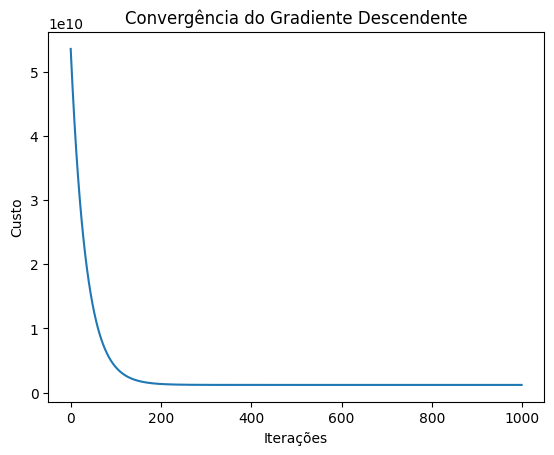

In [18]:
# Plot da curva de custo para verificar a convergência
plt.plot(custos)
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.title("Convergência do Gradiente Descendente")
plt.show()
